# CC3001 2023-1 - Tarea 6: Quicksort
# Nombre: David Garcia
Profesores: Iván Sipirán, Nelson Baloian, Patricio Poblete




En esta tarea, usted debe comparar el desempeño de la versión original de Quicksort con el de la variante "Mediana de 3". En la **primera**, el método de partición debe **elegir el pivote como el primer elemento** del sub arreglo que está particionando. En la **segunda**, el pivote debe elegirse como la **mediana entre el primero, el del medio y el último elemento**. Usted debe entregar un link a su tarea en `colab`.

---
# Quicksort original




La versión que se vio en cátedra de Quicksort elige el pivote como un elemento escogido al azar de entre los del arreglo. Para esta tarea vamos a elegir el pivote como el primer elemento del subarreglo para evitar usar la función random.randint() de python que puede ser muy lenta. Dado que para esta tarea los arreglos a ordenar se generarán de manera aleatoria, el primer elemento de la serie se puede ver como un elemento escogido al azar. Sin embargo, esta no es una práctica recomendable en la realidad, ya que si el arreglo viene ordenado, esto llevará a que se tenga el peor caso de Quicksort. La implementación que usaremos de Quicksort es la siguiente:

In [ ]:
def quicksort(a):
    global comparaciones
    comparaciones = 0 #Se reinicia el contador cada que se llama a ordenar un array nuevo antes de entrar al qsort recursivo
    qsort(a,0,len(a)-1)

def qsort(a,i,j): # ordena a[i],...,a[j]
    if i<j: # quedan 2 o más elementos por ordenar
        k=particion(a,i,j)
        qsort(a,i,k-1)
        qsort(a,k+1,j)

def particion(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
    # a[i] es el pivote
    s=i # invariante: a[i+1..s]<=a[i], a[s+1..t]>a[i]
    global comparaciones

    for t in range(s,j):
        if a[t+1]<=a[i]:
            (a[s+1],a[t+1])=(a[t+1],a[s+1])
            s=s+1
        comparaciones += 1
    # mover pivote al centro
    (a[i],a[s])=(a[s],a[i])
    return s

In [ ]:
def chequea_orden(a):
    print("Ordenado" if np.all(a[:-1]<=a[1:]) else "Desordenado")

In [ ]:
#Para probar individualmente quicksort pivote izquierda
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort(a)
print(a)
chequea_orden(a)
c = comparaciones
print("Se hicieron " + str(c) + " comparaciones")

[0.08351933 0.84702819 0.243229   0.94132429 0.47348311 0.74648278
 0.31056866 0.1499152  0.93706938 0.50004868 0.27659795 0.16280823
 0.87590787 0.75262596 0.73313106 0.24797661 0.39822811 0.76337971
 0.13571753 0.04308075 0.31816139 0.16819084 0.10293647 0.16043664
 0.44356073 0.25638297 0.97830324 0.76011156 0.4933623  0.00417409]
Desordenado
[0.00417409 0.04308075 0.08351933 0.10293647 0.13571753 0.1499152
 0.16043664 0.16280823 0.16819084 0.243229   0.24797661 0.25638297
 0.27659795 0.31056866 0.31816139 0.39822811 0.44356073 0.47348311
 0.4933623  0.50004868 0.73313106 0.74648278 0.75262596 0.76011156
 0.76337971 0.84702819 0.87590787 0.93706938 0.94132429 0.97830324]
Ordenado
Se hicieron 144 comparaciones


# La tarea: Quicksort con mediana de tres

Usted debe programar una partición que determine el pivote como la mediana de tres elementos escogido entre el primer, el del medio y el último del segmento a particionar. Para esto, debe modificar el algoritmo de partición de modo que  re-ordene estos 3 elementos dejando en $a[i]$ el mínimo de los 3, en $a[i+1]$ la mediana de los 3 y en $a[j]$ el máximo de los 3. Luego, se aplica el algoritmo de partición ya conocido al segmento $a[i+2],\ldots,a[j-1]$, con $a[i+1]$ como pivote. Al terminar, el pivote se mueve al centro y se retorna su posición.

Otro cambio que se debe hacer es tratar los casos de arreglos de tamaño $0$, $1$ y $2$ como casos de borde, y aplicar ``qsort`` recursivo solo a arreglos de tamaño mayor o igual a 3.

En el siguiente recuadro escriba su algoritmo modificado y luego ejecute las instrucciones de prueba del recuadro siguiente.

In [ ]:
#version Quicksort encontrando 3 elementos al azar
def quicksort3(a):
  global comparaciones3
  comparaciones3 = 0 #Se reinicia el contador cada que se llama a ordenar un array nuevo antes de entrar al qsort3 recursivo
  qsort3(a,0,len(a)-1)

#Esta es la versión del apunte que deberá modificar
def qsort3(a,i,j): # ordena a[i],...,a[j]

  if i<j: # quedan 2 o más elementos por ordenar
    if len (a) == 1 or len(a) == 0: #Casos borde 0,1,2 se comparan de forma sencilla
      return a
    elif len (a) == 2:
      if a[0]>a[1]:
        (a[0],a[1])=(a[1],a[0]) #Intercambiamos
      return a
    else: #Array a tamaño >= 3, entonces podemos hacer qsort de mediana de 3
        k=particionMedianaDe3(a,i,j)
        qsort3(a,i,k-1)
        qsort3(a,k+1,j)

#Implementar esta función de acuerdo al enunciado
def particionMedianaDe3(a,i,j): # particiona a[i],a[i+1],..,a[j], retorna posición del pivote

  #Escogemos el pivote como la mediana entre lo que vive en el rango del primero, el del medio y el ultimo elemento del rango
  #Es decir, de tomar inicialmente a[i] primer elemento; de a[i+1] hasta a[len(a)//2]; a[j] último elemento
  #luego reordenamos estos mismos elementos con a[i] el min de los 3, a[i+1] la mediana, a[j] el maximo de los 3

  if a[i]>a[i+1]: #Saque todos los casos dibujandolo
    (a[i],a[i+1])=(a[i+1],a[i])
    if a[i+1]>a[j]:
      (a[i+1],a[j])=(a[j],a[i+1])
      if a[i]>a[i+1]:
        (a[i],a[i+1])=(a[i+1],a[i])
  elif a[i+1]>a[j]:
    (a[i+1],a[j])=(a[j],a[i+1])
    if a[i]>a[i+1]:
      (a[i],a[i+1])=(a[i+1],a[i])

  #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  #Dejo esto en forma de observación ya que tuve los problemas de tiempo de ejecución por el uso de las funciones min, max y np.median que es como inicialamente lo hice por simpleza
  #Finalmente actualice a lo de arriba ya que es lo eficiente ya que las comparaciones son O(1), es interesante ya que ayuda al aprendizaje de que muchas veces usar funciones o
  #estructuras implementadas por terceros sin saber como funcionan por debajo nos puede servir pero perjudicar también, aprox empeoraba al doble el rendimiento de quicksort3
  #minimo = min(a[i],a[i+1],a[j])
  #med = np.median([a[i], a[i+1], a[j]])
  #maximo = max(a[i],a[i+1],a[j])
  #a[i] = minimo
  #a[i+1] = med
  #a[j] = maximo
  #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  global comparaciones3
  s=i+1 # a[i+1] es el pivote
  for t in range(s,j-1): #Se tiene cuidado de iterar esta vez desde i+1 hasta j-1 que es donde debemos verificar ahora y hacer las comparaciones con nuestro pivote (i+1)
      if a[t+1]<=a[i+1]:
          (a[s+1],a[t+1])=(a[t+1],a[s+1])
          s=s+1
      comparaciones3 += 1
  # mover pivote al centro
  (a[i+1],a[s])=(a[s],a[i+1])

  return s

In [ ]:
#Para probar individualmente quicksort3
import numpy as np
a = np.random.random(30)
print(a)
chequea_orden(a)
quicksort3(a)
print(a)
chequea_orden(a)
c = comparaciones3
print("Se hicieron " + str(c) + " comparaciones")

[0.89597799 0.19342017 0.70632124 0.69215952 0.39422081 0.3395777
 0.98407512 0.26995021 0.68742894 0.692586   0.42114163 0.69850834
 0.37798593 0.58028556 0.86504651 0.76405464 0.84516524 0.05789252
 0.32005334 0.0959742  0.84111631 0.37173512 0.17183762 0.93087938
 0.59032283 0.06711164 0.28796609 0.31982689 0.49740957 0.62563576]
Desordenado
[0.05789252 0.06711164 0.0959742  0.17183762 0.19342017 0.26995021
 0.28796609 0.31982689 0.32005334 0.3395777  0.37173512 0.37798593
 0.39422081 0.42114163 0.49740957 0.58028556 0.59032283 0.62563576
 0.68742894 0.69215952 0.692586   0.69850834 0.70632124 0.76405464
 0.84111631 0.84516524 0.86504651 0.89597799 0.93087938 0.98407512]
Ordenado
Se hicieron 75 comparaciones


Una vez programada la variante quicksort con mediana de tres, se le pide que mida el tiempo promedio que ambas versiones demoran en ordenar y cuente además el número promedio de comparaciones que se hacen dentro de la función de partición para las dos versiones operando sobre el mismo arreglo. Para eso debe crear arreglos con elementos generados al azar (use `np.random.random(n)`, donde `n` es el número de elementos), hacer una copia de él y ordenar uno con el método quicksort original y el otro con el método de mediana de tres, registrando el tiempo que demora cada ordenamiento y la cantidad de comparaciones. Este proceso debe ejecutarlo 15 veces y sacar el promedio del tiempo y de comparaciones para cada versión para un `n` fijo.

Repita el procedimiento para `n` = 100, 500, 1000, 5000, 10000, 20000 y 40000, completando así una tabla similar a la que se ve a continuación.

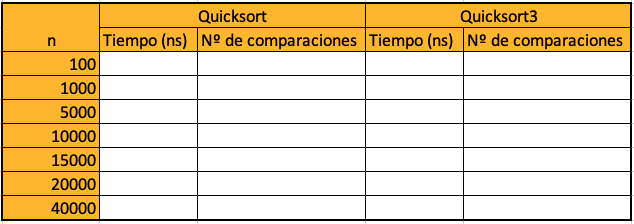


Una vez completada la tabla grafique sus resultados (de la forma que estime más conveniente presentarlos) e incluya el gráfico al final de  este documento. Para tomar el tiempo que demora un proceso puede usar la función `time.gettime_ns(0)` que registra el tiempo actual en nanosegundos que han pasado desde el 1/1/1970 00:00 horas. Puede usarlo de la siguiente manera:

In [ ]:
import time
a = np.random.random(5000)
t1 = time.clock_gettime_ns(0)
quicksort(a)
t2 = time.clock_gettime_ns(0)
print("el tiempo que demoró el proceso fue de ",(t2-t1),"nanosegundos")

el tiempo que demoró el proceso fue de  44140033 nanosegundos


Para **contar las comparaciones puede usar variables globales** que se incrementan convenientemente. **Solo cuente** las **comparaciones** que se hacen **en el proceso de partición (dentro del `for`)**. Tenga sumo cuidado de asegurarse que cada vez que se corra el experimento (ordenamiento del arreglo generado al azar por los dos métodos) estos reciban una copia del arreglo original desordenado y no una referencia al arreglo que ya fue ordenado en una instancia anterior. Programe las instrucciones que ejecuten el experimento descrito anteriormente, en el siguiente recuadro:

           Tiempo de ejecución Q  Comparaciones Q  Tiempo de ejecución Q3  \
n = 100             2.939889e+05           672.20            2.591895e+05   
n = 1000            4.552482e+06         10809.33            4.326510e+06   
n = 5000            3.053082e+07         71602.87            2.639126e+07   
n = 10000           6.285936e+07        155748.00            5.829764e+07   
n = 15000           9.831039e+07        245875.33            9.297432e+07   
n = 20000           1.342732e+08        335678.93            1.287473e+08   
n = 40000           2.839616e+08        736556.40            2.684079e+08   

           Comparaciones Q3  
n = 100              438.27  
n = 1000            8308.67  
n = 5000           54775.67  
n = 10000         122091.73  
n = 15000         194501.73  
n = 20000         268435.07  
n = 40000         586649.47  



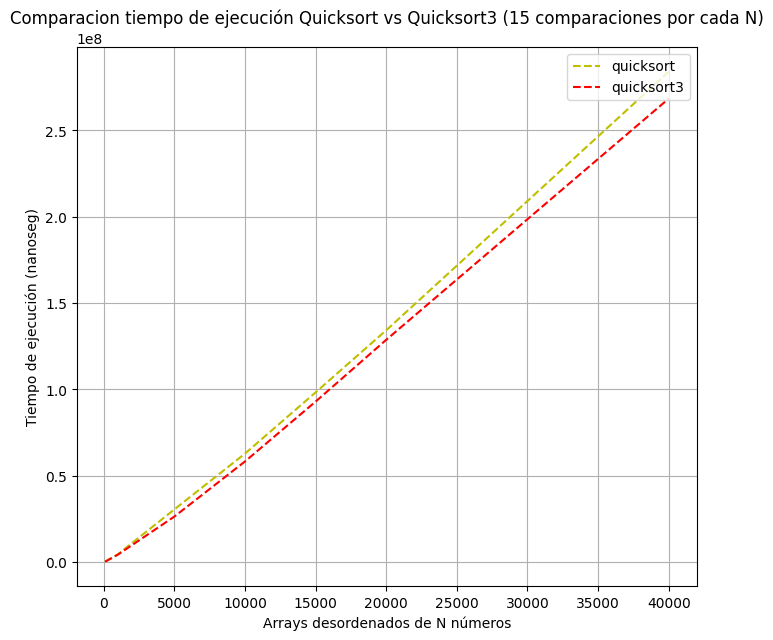

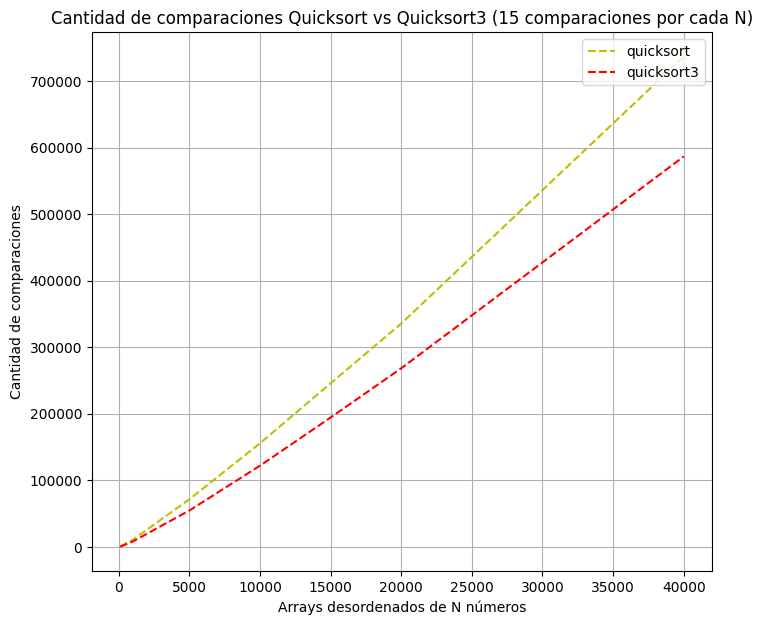

In [ ]:
#----------------------------------------------------------------------VERSION CON 15 APLICACIONES DE LOS ALGORITMOS---------------------------------------------------------------------------------------------------------
import numpy as np
import time
import matplotlib.pyplot as plt

N=15
#y, y2 seran para guardar tiempo; y3, y4 seran para guardar cantidad de comparaciones
y, y2, y3, y4 = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]], [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]], [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]], [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
n = 0
while n < N:

  ns = np.array([100, 1000, 5000, 10000, 15000, 20000, 40000]) #Arreglo que simboliza cantidad de numeros por ordenar
  a = [] #Indice de 0 a 6
  for i in range (len(ns)):
    a.append(np.random.random(ns[i]))

  for i in range(len(ns)): #De igual dimensión que X pues si no da error matplotlib
    copia = np.copy(a[i]) #Tenemos cuidado de hacer las copias del array random a[i] para que el segundo algoritmo que se aplica no tenga que caer en el peor caso de ordenar algo ya ordenado
    t1 = time.clock_gettime_ns(0)
    quicksort(copia)
    t2 = time.clock_gettime_ns(0)
    y[n].append(t2-t1)
    c = comparaciones
    y3[n].append(c)
    copia2 = np.copy(a[i])
    t3 = time.clock_gettime_ns(0)
    quicksort3(copia2)
    t4 = time.clock_gettime_ns(0)
    y2[n].append(t4-t3)
    c = comparaciones3
    y4[n].append(c)
  n += 1

def promedio(y,y2,y3,y4):
  global N
  j=0
  Tprom1aux = [] #Estas listas se ocupan para agrupar juntos los datos de un mismo N para cada una de las 15 aplicaciones, ya que antes estan separados en diferentes listas
  Tprom3aux = [] #ie, acá junto por ejemplo las comparaciones de quicksort para N = 100 las 15 veces y que me queden todas juntas, luego para N = 1000 todas juntas y así...
  Cprom1aux = []
  Cprom3aux = []
  while j < 7:
    for i in range (N):
      Tprom1aux.append(y[i][j])
      Tprom3aux.append(y2[i][j])
      Cprom1aux.append(y3[i][j])
      Cprom3aux.append(y4[i][j])
    j+=1
  #print(Cprom3aux)

  #A estas listas les guardare el valor promedio de la aplicación de un quicksort 15 veces para una cantidad N de datos,
  #son necesarias pues me quedara de tamaño 7 cada lista de acuerdo a el array dado por enunciado ns de 7 N diferentes
  Tprom1 = []
  Tprom3 = []
  Cprom1 = []
  Cprom3 = []

  for k in range(0,j*N,N): #Versión promedio 15 veces
    a = round((Tprom1aux[k]+Tprom1aux[k+1]+Tprom1aux[k+2]+Tprom1aux[k+3]+Tprom1aux[k+4]+Tprom1aux[k+5]+Tprom1aux[k+6]+Tprom1aux[k+7]+Tprom1aux[k+8]+Tprom1aux[k+9]+Tprom1aux[k+10]+Tprom1aux[k+11]+Tprom1aux[k+12]+Tprom1aux[k+13]+Tprom1aux[k+14]) /N ,2)
    b = round((Tprom3aux[k]+Tprom3aux[k+1]+Tprom3aux[k+2]+Tprom3aux[k+3]+Tprom3aux[k+4]+Tprom3aux[k+5]+Tprom3aux[k+6]+Tprom3aux[k+7]+Tprom3aux[k+8]+Tprom3aux[k+9]+Tprom3aux[k+10]+Tprom3aux[k+11]+Tprom3aux[k+12]+Tprom3aux[k+13]+Tprom3aux[k+14]) /N ,2)
    c = round((Cprom1aux[k]+Cprom1aux[k+1]+Cprom1aux[k+2]+Cprom1aux[k+3]+Cprom1aux[k+4]+Cprom1aux[k+5]+Cprom1aux[k+6]+Cprom1aux[k+7]+Cprom1aux[k+8]+Cprom1aux[k+9]+Cprom1aux[k+10]+Cprom1aux[k+11]+Cprom1aux[k+12]+Cprom1aux[k+13]+Cprom1aux[k+14]) /N ,2)
    d = round((Cprom3aux[k]+Cprom3aux[k+1]+Cprom3aux[k+2]+Cprom3aux[k+3]+Cprom3aux[k+4]+Cprom3aux[k+5]+Cprom3aux[k+6]+Cprom3aux[k+7]+Cprom3aux[k+8]+Cprom3aux[k+9]+Cprom3aux[k+10]+Cprom3aux[k+11]+Cprom3aux[k+12]+Cprom3aux[k+13]+Cprom3aux[k+14]) /N ,2)
    Tprom1.append(a)
    Tprom3.append(b)
    Cprom1.append(c)
    Cprom3.append(d)
  #print(Cprom3)
  return Tprom1, Tprom3, Cprom1, Cprom3

y,y2,y3,y4 = promedio(y,y2,y3,y4)

import pandas as pd
data = {'Tiempo de ejecución Q': y, 'Comparaciones Q': y3, 'Tiempo de ejecución Q3': y2, 'Comparaciones Q3': y4}
df = pd.DataFrame(data)
# Cambiar los ajustes de visualización
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.index = ['n = ' + str(i) for i in ns]
print(df)

print()
#Grafico de tiempos
fig = plt.figure(figsize=(8,7))
plt.title('Comparacion tiempo de ejecución Quicksort vs Quicksort3 (15 comparaciones por cada N)')
plt.xlabel("Arrays desordenados de N números")
plt.ylabel("Tiempo de ejecución (nanoseg)")
plt.plot(ns,y,'y--')
plt.plot(ns,y2,'r--')
plt.legend(('quicksort','quicksort3'), prop = {'size' : 10}, loc = 'upper right')
plt.grid()
plt.show()

print()
#Grafico de comparaciones
fig = plt.figure(figsize=(8,7))
plt.title('Cantidad de comparaciones Quicksort vs Quicksort3 (15 comparaciones por cada N)')
plt.xlabel("Arrays desordenados de N números")
plt.ylabel("Cantidad de comparaciones")
plt.plot(ns,y3,'y--')
plt.plot(ns,y4,'r--')
plt.legend(('quicksort','quicksort3'), prop = {'size' : 10}, loc = 'upper right')
plt.grid()
plt.show()

           Tiempo de ejecución Q  Comparaciones Q  Tiempo de ejecución Q3  \
n = 100                   455650              572                  389310   
n = 1000                 8640700            10635                 7373003   
n = 5000                53844802            72261                35294062   
n = 10000               54000392           154995                53572232   
n = 15000               94636237           246739                88667003   
n = 20000              134274543           368036               123433146   
n = 40000              269461966           709514               251761906   

           Comparaciones Q3  
n = 100                 405  
n = 1000               8197  
n = 5000              54406  
n = 10000            120734  
n = 15000            201442  
n = 20000            270573  
n = 40000            595231  



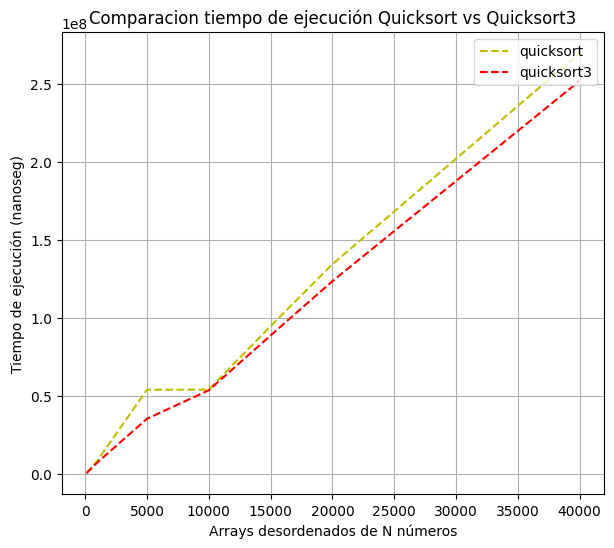

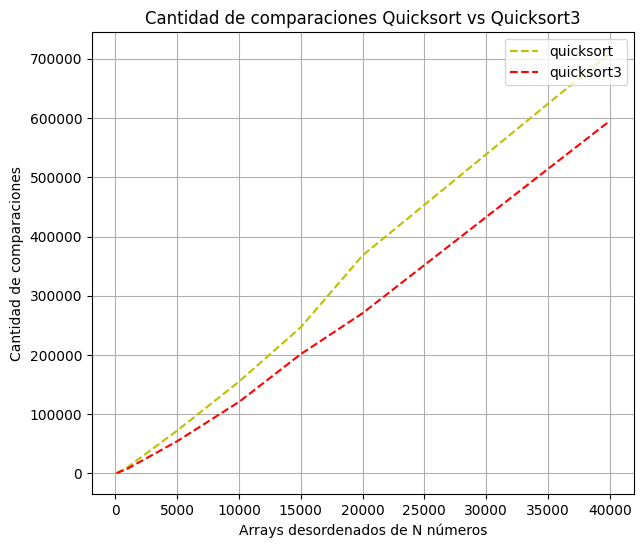

In [ ]:
#--------------------------------------------------------VERSION DATOS CON 1 SOLA APLICACION DE LOS ALGORITMOS--------------------------------------------------------------------------------------------------------------------
import numpy as np
import time
import matplotlib.pyplot as plt

ns = np.array([100, 1000, 5000, 10000, 15000, 20000, 40000]) #Arreglo que simboliza cantidad de numeros por ordenar

a = [] #Indice de 0 a 6
for i in range (len(ns)):
  a.append(np.random.random(ns[i]))

y, y2, y3, y4 = [], [], [], [] #y, y2 seran para guardar tiempo; y3, y4 seran para guardar cantidad de comparaciones

for i in range(len(ns)): #De igual dimensión que X pues si no da error matplotlib
  copia = np.copy(a[i]) #Tenemos cuidado de hacer las copias del array random a[i] para que el segundo algoritmo que se aplica no tenga que caer en el peor caso de ordenar algo ya ordenado
  t1 = time.clock_gettime_ns(0)
  quicksort(copia)
  t2 = time.clock_gettime_ns(0)
  y.append(t2-t1)
  c = comparaciones
  y3.append(c)
  copia2 = np.copy(a[i])
  t3 = time.clock_gettime_ns(0)
  quicksort3(copia2)
  t4 = time.clock_gettime_ns(0)
  y2.append(t4-t3)
  c = comparaciones3
  y4.append(c)

import pandas as pd
data = {'Tiempo de ejecución Q': y, 'Comparaciones Q': y3, 'Tiempo de ejecución Q3': y2, 'Comparaciones Q3': y4}
df = pd.DataFrame(data)
# Cambiar los ajustes de visualización
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.index = ['n = ' + str(i) for i in ns]
print(df)

print()
#Grafico de tiempos
fig = plt.figure(figsize=(7,6))
plt.title('Comparacion tiempo de ejecución Quicksort vs Quicksort3')
plt.xlabel("Arrays desordenados de N números")
plt.ylabel("Tiempo de ejecución (nanoseg)")
plt.plot(ns,y,'y--')
plt.plot(ns,y2,'r--')
plt.legend(('quicksort','quicksort3'), prop = {'size' : 10}, loc = 'upper right')
plt.grid()
plt.show()

print()
#Grafico de comparaciones
fig = plt.figure(figsize=(7,6))
plt.title('Cantidad de comparaciones Quicksort vs Quicksort3')
plt.xlabel("Arrays desordenados de N números")
plt.ylabel("Cantidad de comparaciones")
plt.plot(ns,y3,'y--')
plt.plot(ns,y4,'r--')
plt.legend(('quicksort','quicksort3'), prop = {'size' : 10}, loc = 'upper right')
plt.grid()
plt.show()